C:\Users\user\AppData\Local\Temp\ipykernel_16676\530384328.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prior_data = filtered_data[(data['年月日'] < pd.Timestamp(f'2024-{target_month}-{target_day}')) &
C:\Users\user\AppData\Local\Temp\ipykernel_16676\530384328.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recent_data = filtered_data[(data['年月日'].dt.year > data['年月日'].dt.year.max() - 3) &
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: Use

            年月日  平均気温(℃)  品質情報  均質番号  最高気温(℃)  品質情報.1  均質番号.1  最低気温(℃)  \
732  2017-04-05     13.6     8     1     19.0       8       1      7.5   
1097 2018-04-05     15.9     8     1     20.8       8       1     12.6   
1462 2019-04-05     14.5     8     1     20.6       8       1      6.3   
1828 2020-04-05     12.1     8     1     16.1       8       1      8.4   
2193 2021-04-05     16.7     8     1     22.6       8       1     13.0   
2558 2022-04-05     13.8     8     1     19.4       8       1      6.5   
2923 2023-04-05     16.4     8     1     21.3       8       1     12.2   

      品質情報.2  均質番号.2  
732        8       1  
1097       8       1  
1462       8       1  
1828       8       1  
2193       8       1  
2558       8       1  
2923       8       1  


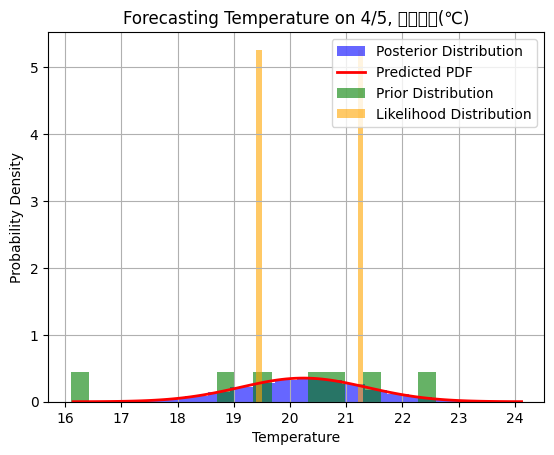

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# 過去の気温データの読み込み
data = pd.read_csv(r'C:\Users\user\Downloads\data (1).csv', encoding='shift_jis')

# 日付列を日付型に変換
data['年月日'] = pd.to_datetime(data['年月日'])

# 月と日を指定してデータをフィルタリング
target_month = 4  # 予測したい月を指定してください
target_day = 5  # 予測したい日を指定してください
target_temp = '最高気温(℃)'

filtered_data = data[(data['年月日'].dt.month == target_month) & (data['年月日'].dt.day == target_day)]
#print(filtered_data)

# 事前分布として過去7年分のデータを使用
prior_data = filtered_data[(data['年月日'] < pd.Timestamp(f'2024-{target_month}-{target_day}')) &
                  (data['年月日'].dt.year >= data['年月日'].dt.year.max() - 7)]
print(prior_data)

# 直近3年分から尤度を算出
recent_data = filtered_data[(data['年月日'].dt.year > data['年月日'].dt.year.max() - 3) &
                   (data['年月日'] < pd.Timestamp(f'2024-{target_month}-{target_day}'))]

# 尤度の平均と標準偏差を算出
mu_likelihood = recent_data[target_temp].mean()
std_likelihood = recent_data[target_temp].std()

# 事前分布の平均と標準偏差を算出
mu_prior = prior_data[target_temp].mean()
std_prior = prior_data[target_temp].std()

# 事後確率の平均と標準偏差を計算
mu_posterior = (mu_prior / std_prior**2 + mu_likelihood / std_likelihood**2) / (1 / std_prior**2 + 1 / std_likelihood**2)
std_posterior = np.sqrt(1 / (1 / std_prior**2 + 1 / std_likelihood**2))

# ベイズ推定による未来の気温の予測
n = 10000  # サンプル数
samples = np.random.normal(mu_posterior, std_posterior, n)

# 未来の気温の予測結果の可視化
plt.hist(samples, bins=20, density=True, alpha=0.6, color='b', label='Posterior Distribution')

# 未来の気温の確率密度関数のプロット
x = np.linspace(min(samples), max(samples), 100)
plt.plot(x, norm.pdf(x, mu_posterior, std_posterior), 'r-', lw=2, label='Predicted PDF')

# 事前分布のヒストグラム
plt.hist(prior_data[target_temp], bins=20, density=True, alpha=0.6, color='g', label='Prior Distribution')

# 尤度のヒストグラム
plt.hist(recent_data[target_temp], bins=20, density=True, alpha=0.6, color='orange', label='Likelihood Distribution')

plt.xlabel('Temperature')
plt.ylabel('Probability Density')
plt.title(f'Forecasting Temperature on {target_month}/{target_day}, {target_temp}')
plt.legend()
plt.grid(True)
plt.show()
